# Prelab 1
Vivek Gopalakrishnan | September 11, 2019

## Exercise 1.
Create a sequence (list) of numbers corresponding to sampled values of the function $\sin(2\pi t)$ over one period, and with a sampling frequency $f_s = 8$ Hz. In other words, create a sequence:

$$x_n = \sin(2\pi n T),\quad n=0,1,\ldots,\lfloor f_s\rfloor,\quad T = \frac{1}{f_s},$$

where $\lfloor x \rfloor$ denotes the largest integer smaller than $x$. Print the sequence of values. 

In [1]:
from math import sin, pi, floor

In [2]:
sampling_frequency = 8

sequence = [
    sin(2 * pi * n / sampling_frequency)
    for n in range(0, floor(sampling_frequency))
]

print(sequence)

[0.0, 0.7071067811865475, 1.0, 0.7071067811865476, 1.2246467991473532e-16, -0.7071067811865475, -1.0, -0.7071067811865477]


## Exercise 2
Create two sequences $x_n$ and $y_n$ by sampling $\sin(2\pi t)$ and $\cos(4\pi t)$ with sampling rate $f_s = 64$ Hz, and store them in two separate lists. Write a function `add_sequence(x,y)` that returns the addition of the two lists. Plot the result of the addition in a graph adding the corresponding labels for the axes.

Repeat the addition task before using vector array operations with the `numpy` module.

In [3]:
from math import cos

import matplotlib.pyplot as plt
import numpy as np

In [4]:
sampling_frequency = 64

x_n = [
    sin(2 * pi * n / sampling_frequency)
    for n in range(0, floor(sampling_frequency))
]

y_n = [
    cos(4 * pi * n / sampling_frequency)
    for n in range(0, floor(sampling_frequency))
]

In [5]:
def add_sequence(x, y):
    return [x_i + y_i for (x_i, y_i) in zip(x, y)]

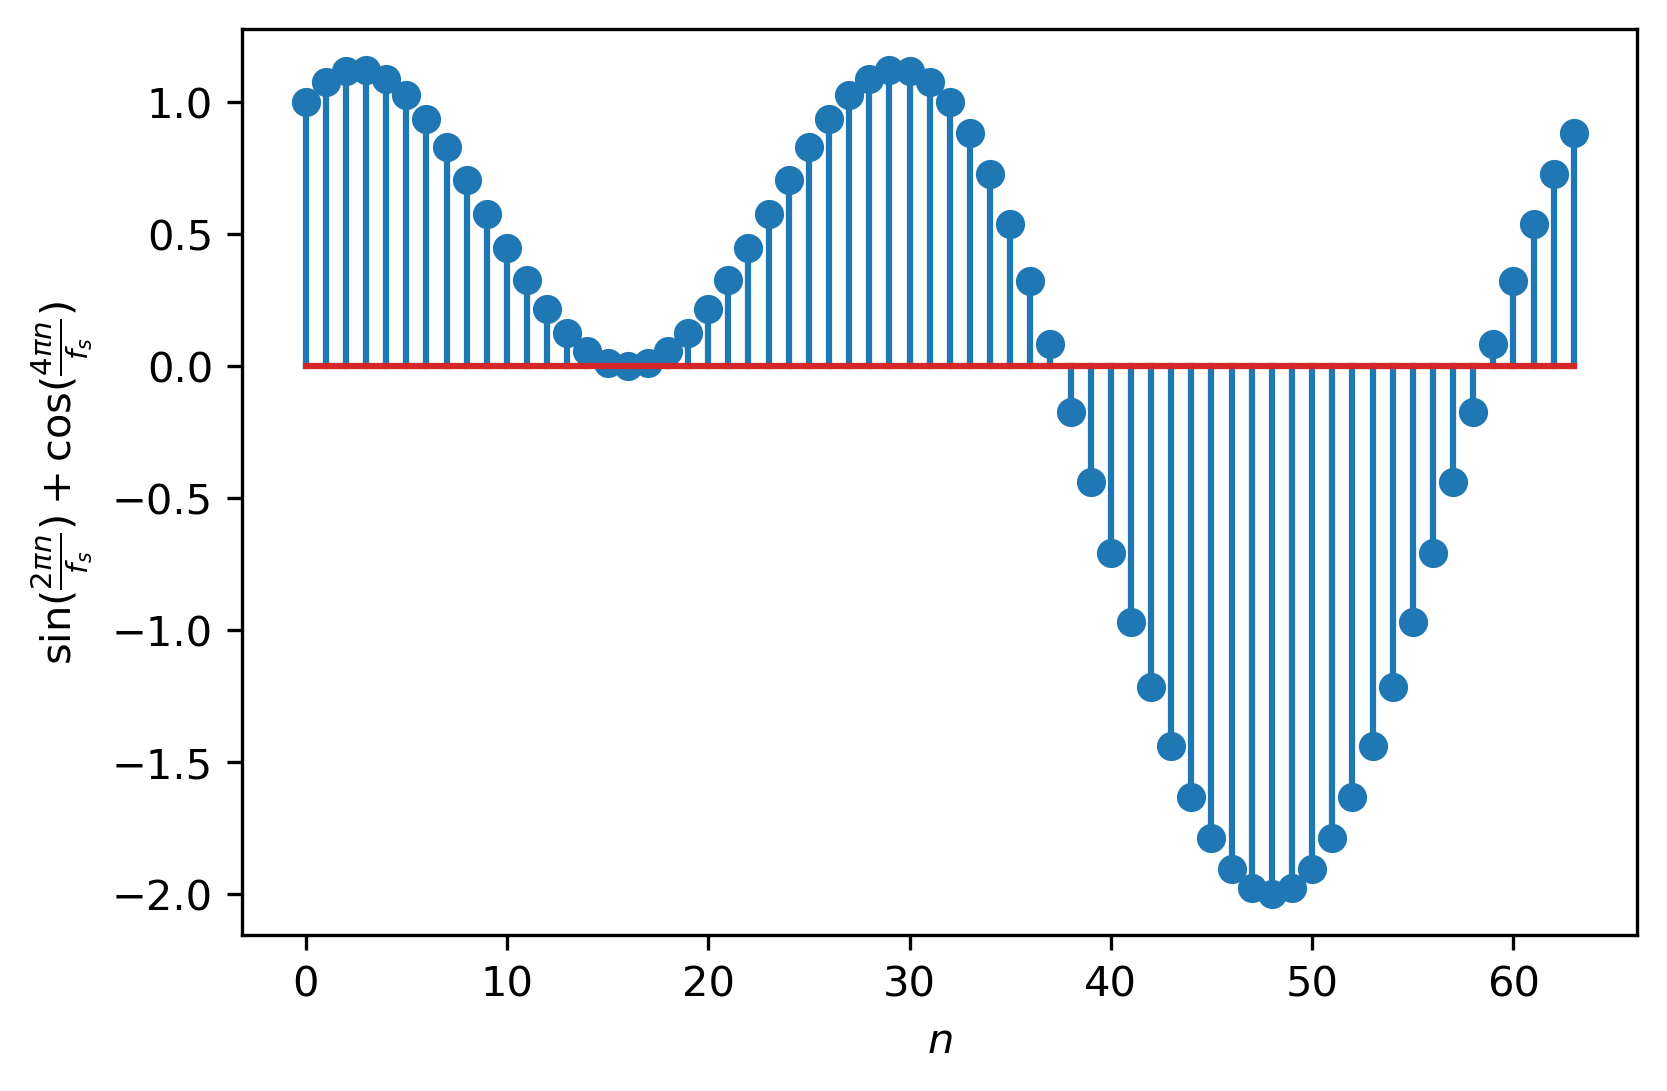

In [6]:
fig, ax = plt.subplots(dpi=300)
ax.stem(range(0, sampling_frequency), add_sequence(x_n, y_n))
ax.set(xlabel=r"$n$", 
       ylabel=r"$\sin(\frac{2\pi n}{f_s}) + \cos(\frac{4\pi n}{f_s})$")
plt.show()

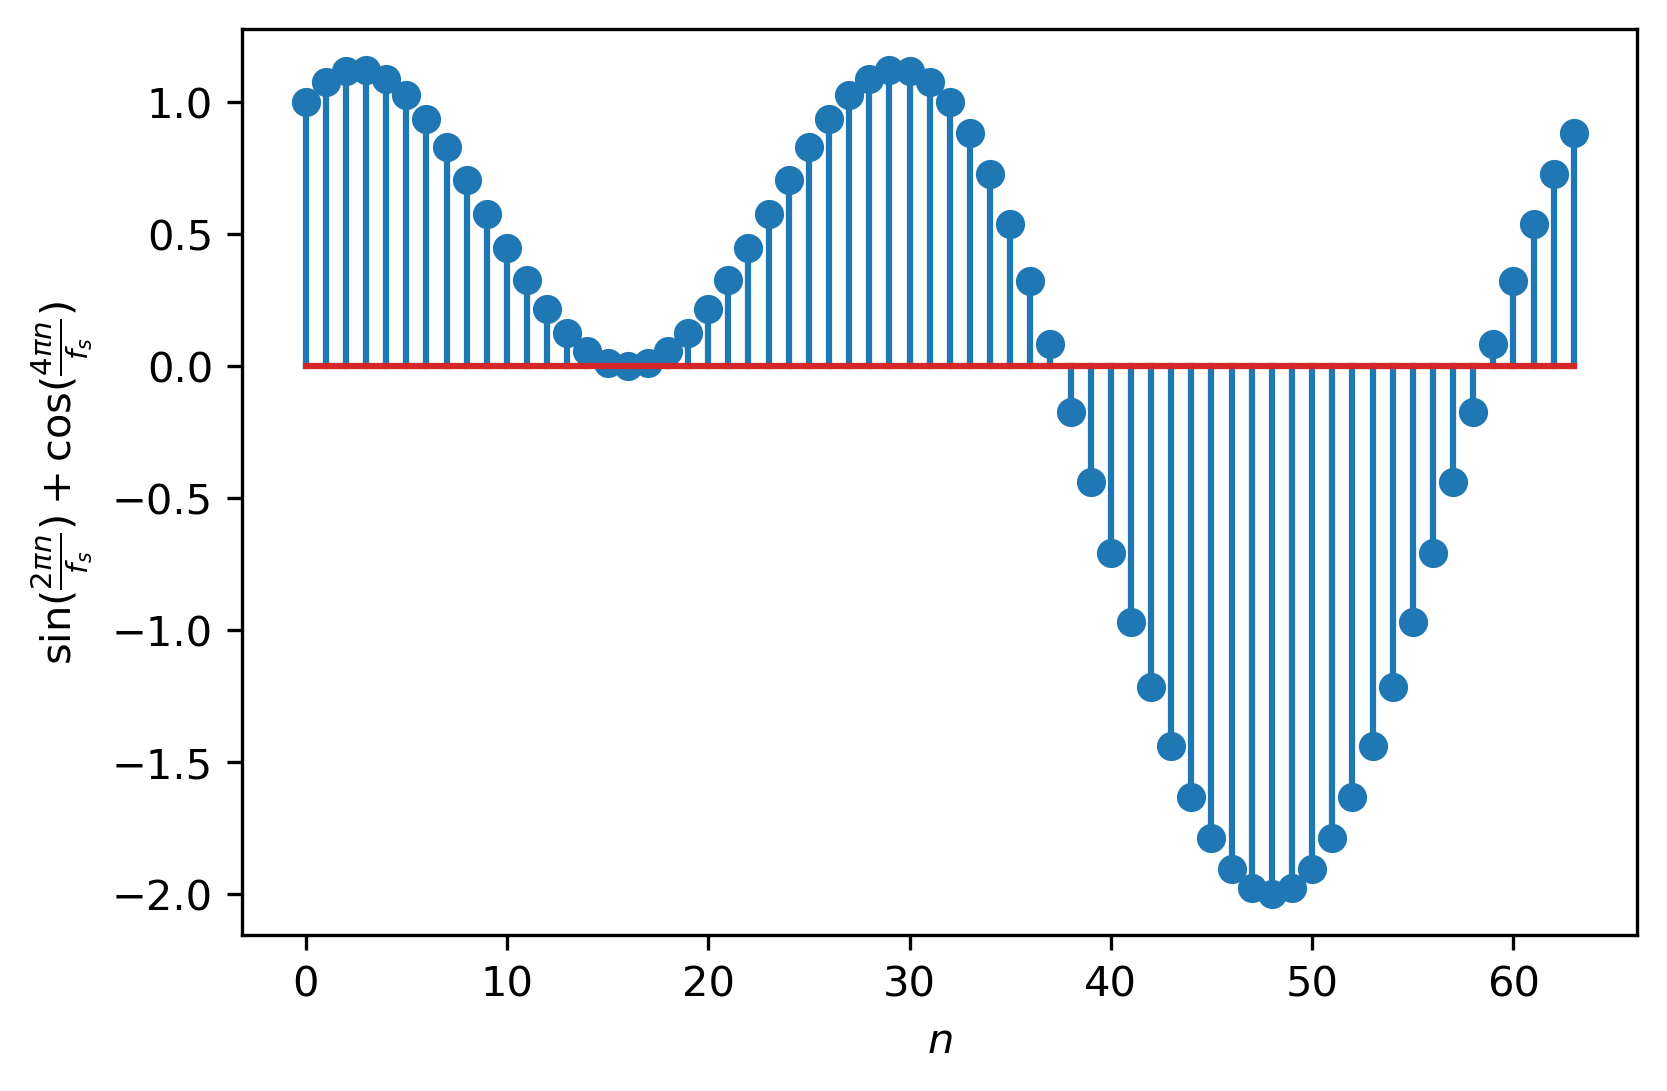

In [7]:
# Do it in numpy
x_n = np.array(x_n)
y_n = np.array(y_n)

fig, ax = plt.subplots(dpi=300)
ax.stem(range(0, sampling_frequency), x_n+y_n)
ax.set(xlabel=r"$n$",
       ylabel=r"$\sin(\frac{2\pi n}{f_s}) + \cos(\frac{4\pi n}{f_s})$")
plt.show()

## Exercise 3 
Using the definition of the DTFT show the property that convolution in time is equivalent to multiplication in the frequency domain. In other words, show that for $y_n = x_n\ast h_n$, its DTFT $Y(e^{j\omega}) = X(e^{j\omega})H(e^{j\omega})$

$$
\begin{align}
Y(e^{j\omega}) &= \sum_{n\in\mathbb{Z}}y_n e^{-j\omega n} \\
&= \sum_{n\in\mathbb{Z}} \left( \sum_{k\in\mathbb{Z}} x_k h_{n-k} \right) e^{-j\omega n} \\
&= \sum_{k\in\mathbb{Z}} \sum_{n\in\mathbb{Z}} x_k h_{n-k} e^{-j\omega n} \\
&= \sum_{k\in\mathbb{Z}} x_k \sum_{n\in\mathbb{Z}} h_{n-k} e^{-j\omega n} \\
&= \sum_{k\in\mathbb{Z}} x_k \sum_{n\in\mathbb{Z}} h_{n-k} e^{-j\omega n} (e^{-j\omega (k-k)}) \\
&= \sum_{k\in\mathbb{Z}} x_k e^{-j\omega k} \sum_{n\in\mathbb{Z}} h_{n-k} e^{-j\omega (n-k)} \\
&= \sum_{k\in\mathbb{Z}} x_k e^{-j\omega k} H(e^{j\omega}) \\
&= X(e^{j\omega}) H(e^{j\omega})
\end{align}
$$

## Exercise 4

Generate two box sequences as defined below:

$$x_n = \begin{cases}1 &0\leq n\leq 10\\0 &\textrm{else}\end{cases},\quad h_n = \begin{cases}1 &0\leq n\leq 20\\0 &\textrm{else}\end{cases},\quad n = 0,\ldots,63.$$

Compute $y_n = x_n \ast h_n$ using `numpy.convolve` and plot (`plt.stem`) the resulting sequence $y_n$. Compute the DFT $Y_k$ and plot its **magnitude** over the frequency range $[-\pi,\pi]$. _(Hint. Use `numpy.fft.fftshift`)_. Label the horizontal and vertical axes.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Generate the sequences
x_n = [1 if n in range(0, 11) else 0 for n in range(0, 64)]
h_n = [1 if n in range(0, 21) else 0 for n in range(0, 64)]

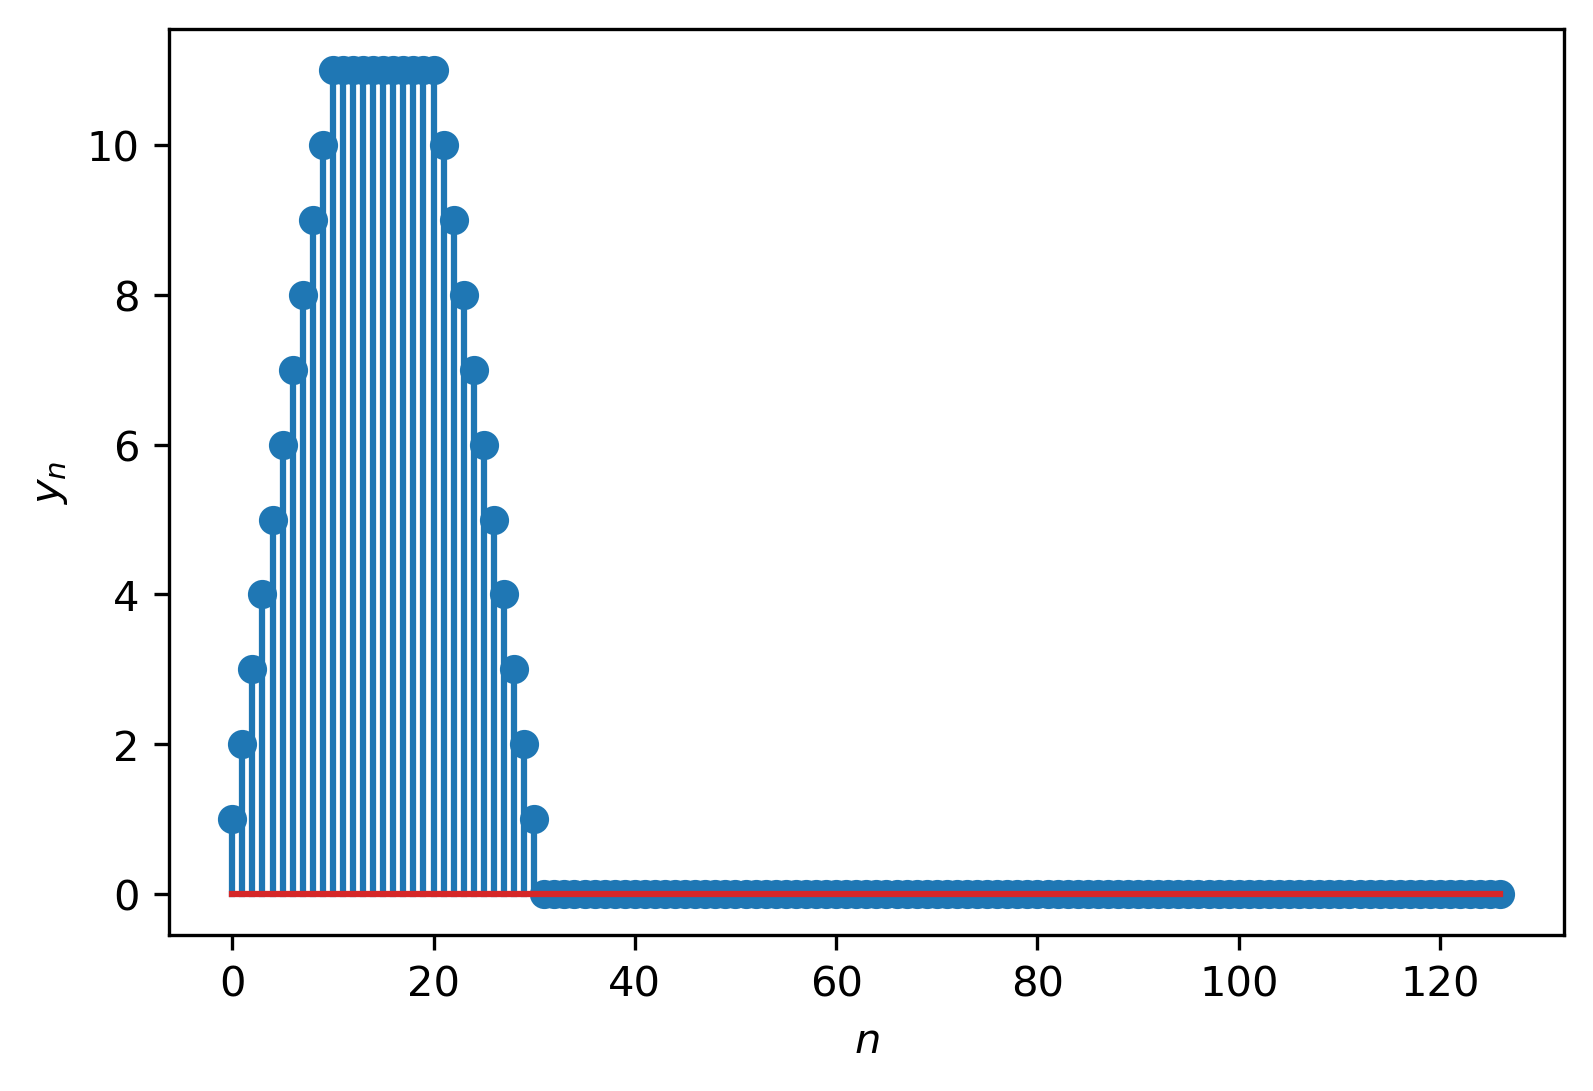

In [10]:
# Convolve the sequences
y_n = np.convolve(x_n, h_n)

fig, ax = plt.subplots(dpi=300)
ax.stem(y_n)
ax.set(xlabel=r"$n$", 
       ylabel=r"$y_n$")
plt.show()

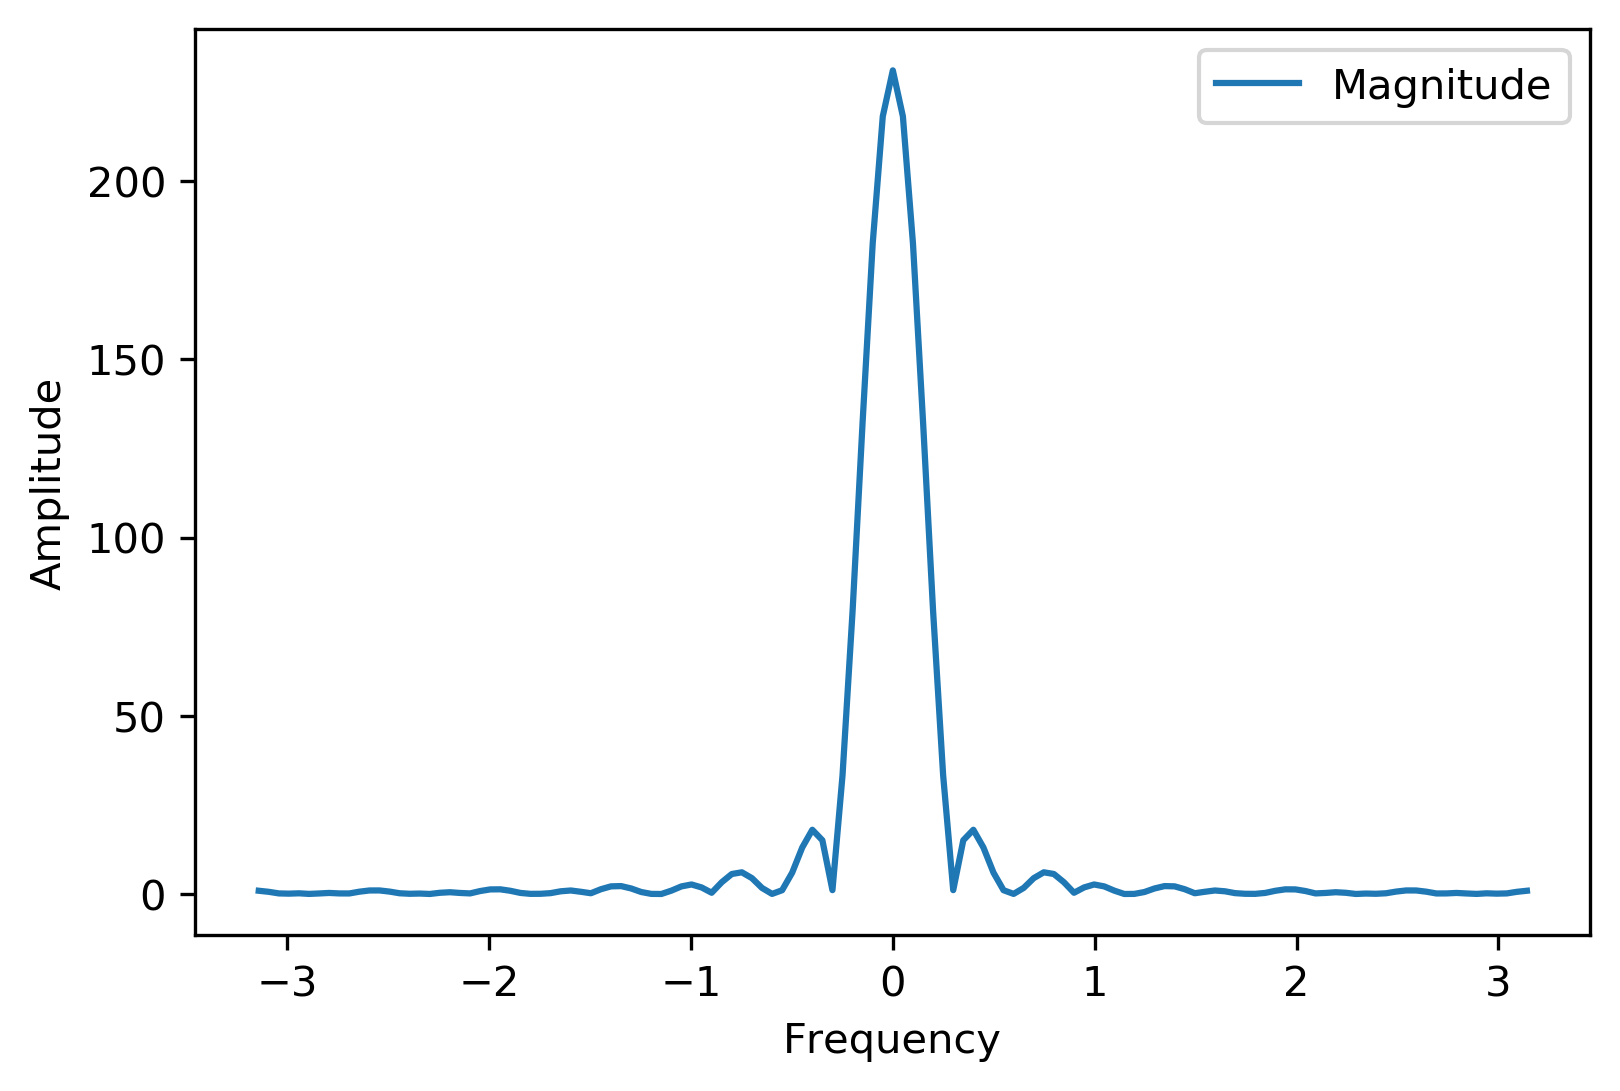

In [11]:
# Plot the magnitudes of the discrete FT of y_n

y = np.fft.fft(y_n)
y = np.fft.fftshift(y)
x = np.linspace(-np.pi, np.pi, num=len(y))

fig, ax = plt.subplots(dpi=300)
ax.plot(x, np.absolute(y), label="Magnitude")
ax.set(xlabel=r"Frequency", ylabel=r"Amplitude")
ax.legend()
plt.show()

## Exercise 5
For this exercise, generate the sequence defined by the following finite difference equation:

$$ x_n = \alpha x_{n-1} + \beta x_{n-2} + \epsilon_{n},\quad x_0=x_1=0,\quad n=0,1,\ldots,127, $$

where the driving noise sequence $\epsilon_{n}$ consists of independent and identically distributed random numbers from a standard, normal distribution `numpy.random.randn`. For the coefficients, generate three random pairs of $(\alpha,\beta)$ where $\alpha,\beta \sim \mathcal{U}(-1,1)$ (uniformly distributed between -1 and 1). Plot the three time-series on the same figure. Include a title, axis labels, and a legend that lists the generated  $( \alpha,\beta)$ values of each time-series.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Fix random number generator seed
np.random.seed(10)

In [14]:
def generate_sequence(noise):
    
    # Sample alpha and beta
    a, b = np.random.uniform(-1, 1, size=2)
    
    # Initialize the sequence
    x, y = 0, 0
    sequence = [x, y]
    
    # Generate the noisy signal
    for e_i in noise:
        z = a * y + b * x + e_i
        sequence.append(z)
        x, y = y, z
        
    return sequence, a, b

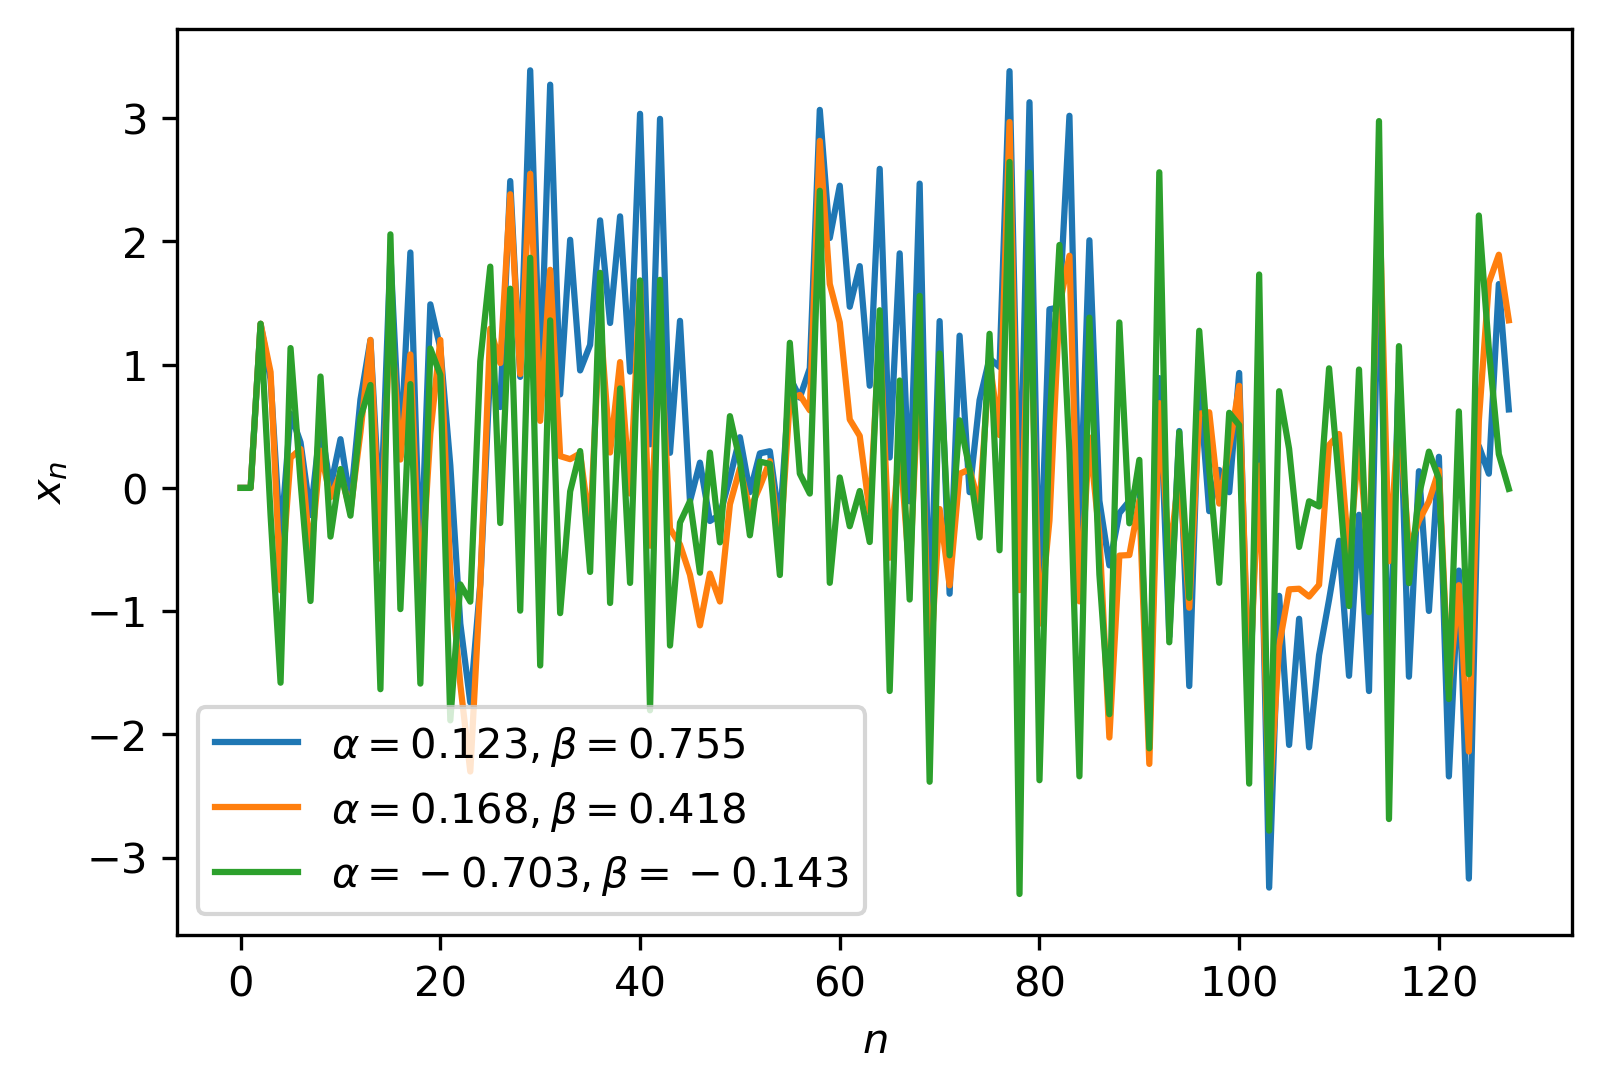

In [15]:
# Create a vector of driving noise that is 126 elements 
# (for a total sequence that is 128 elements long)
noise = np.random.randn(126)

# For 3 iterations, generate a signal and plot it
fig, ax = plt.subplots(dpi=300)

for _ in range(3):    
    x, a, b = generate_sequence(noise)
    a, b = round(a, 3), round(b, 3)
    plt.plot(list(range(0, 128)), x, label=r"$\alpha = {}, \beta = {}$".format(a, b))
    plt.xlabel(r"$n$")
    plt.ylabel(r"$x_n$")

plt.legend()
plt.show()

## Exercise 6
In this exercise you will perform a basic denoising operation by filtering a noisy signal with a low-pass filter. You are provided with a function `get_noisy_signal()` that returns a signal corrupted with noise. Let a Gaussian filter $g_n$ be defined as:

$$g_n = \frac{1}{K}e^{-(n/\sigma)^2},\quad -10\leq n\leq10,$$

where $K$ is a constant such that the weights of the filter add up to 1, and where $\sigma$ is a parameter. Filter the signal for three different values of $\sigma=1,5,10$. Observe the trade-off between denoising and sharpness of the signal. Compare the original signal with its denoised versions by plotting them in the same figure. Add labels and legends as appropriate. Why do we loose sharp transitions when filtering with a wider kernel?

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Fix random number generator seed (reproducibility)
np.random.seed(10)

In [18]:
# Generate stepwise function with noise
def get_noisy_signal(s=0.2):
    """
    This function generates a signal with a varying amount of noise. The noise
    variance is controlled via the input parameter s [s=1 default].
    """
    
    # generate signal
    N = 128
    t = np.arange(N)
    x = np.sin(2*np.pi*t/N)
    x[80:105] -= 1
    
    # generate noise
    n = s*np.random.randn(128)
    
    # return noisy signal
    return x+n

In [19]:
# Generate the Gaussian kernel
def get_gaussian_filter(sigma):
    n = np.arange(-10, 11)
    g_n = -(n / sigma) ** 2
    g_n = np.exp(g_n)
    g_n = g_n / np.sum(g_n)
    return g_n

In [20]:
x = get_noisy_signal()

s1 = np.convolve(x, get_gaussian_filter(1), mode="same")
s5 = np.convolve(x, get_gaussian_filter(5), mode="same")
s10 = np.convolve(x, get_gaussian_filter(10), mode="same")

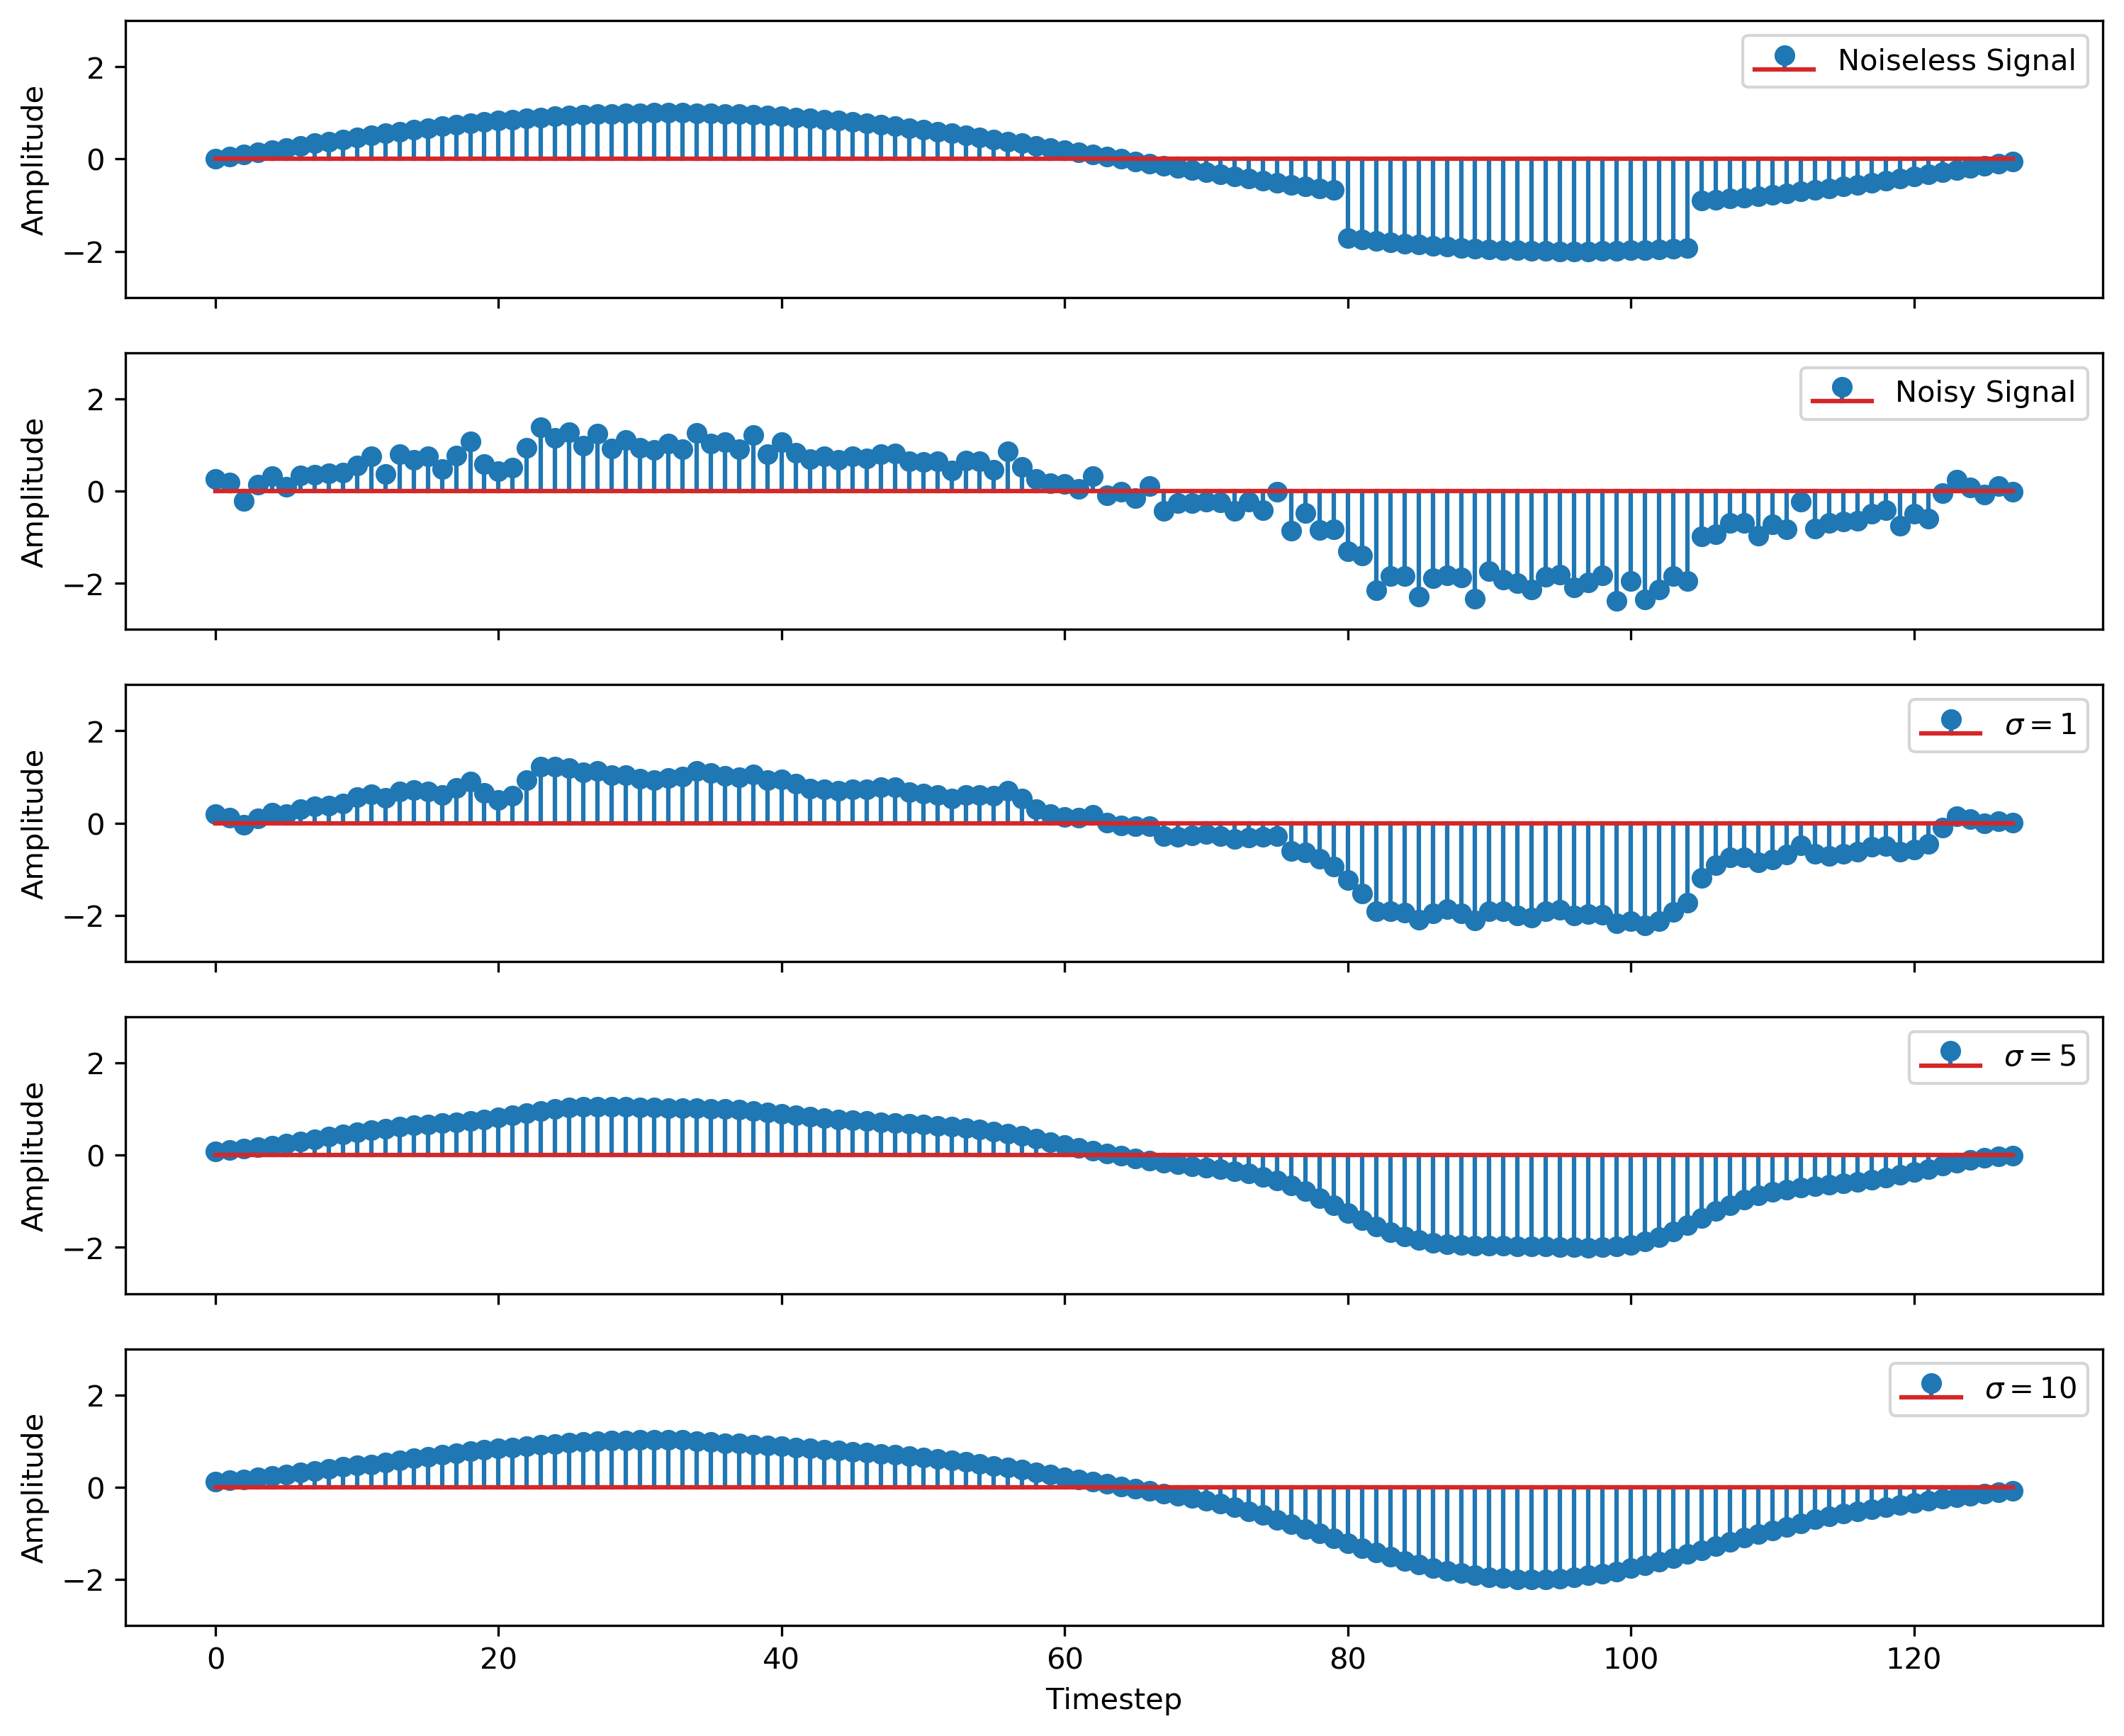

In [21]:
fig, axs = plt.subplots(nrows=5, sharex=True, sharey=True, dpi=300, figsize=(12, 10))

axs[0].stem(range(128), get_noisy_signal(s=0), label=u"Noiseless Signal")
axs[1].stem(range(128), x, label=u"Noisy Signal")
axs[2].stem(range(128), s1, label=u"$\sigma=1$")
axs[3].stem(range(128), s5, label=u"$\sigma=5$")
axs[4].stem(range(128), s10, label=u"$\sigma=10$")

for ax in axs:
    ax.set_ylim([-3, 3])
    ax.set(ylabel=r"Amplitude")
    ax.legend()
axs[4].set(xlabel=r"Timestep")

plt.show()

**Question:** Why do we loose sharp transitions when filtering with a wider kernel?

**Asnwer:** The parameter $\sigma$ controls the variance of the Guassian kernel. As $\sigma$ increases, the spread of the Gaussian filter increases. From the figure above, we see that as $\sigma$ increases, the convolved signals are less noisy, but lack detail compared to the original signal (specifically, when $\sigma=10$, the jump discontinuities at $x=80$ and $x=105$ are completely lost and the denoised signal appears continuous). When $\sigma$ is large, the practical size of the convolutional window increases, smoothing the input signal over a larger area (see the figure below). This decreases the filter's ability to preserve sharp transitions in the original signal.

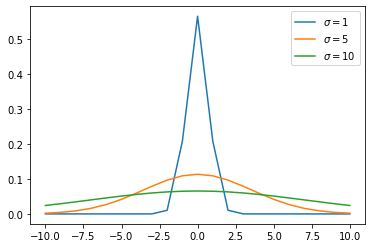

In [22]:
for i in [1, 5, 10,]:
    plt.plot(np.arange(-10, 11), get_gaussian_filter(i), label=r"$\sigma={}$".format(i))

plt.legend()
plt.show()